# <center>**Group Name: DataSmiths**</center>

## **Group Members**

1. **Vamsi Routhu**
2. **Sai Kiran Bommena**
3. **Avinash Betha**

# Heart Disease Prediction Project

## Introduction
This project aims to analyze a heart disease dataset to gain insights and build predictive models that can help in predicting heart disease based on various features.

## Objectives
- Preprocess and prepare the dataset for analysis.
- Perform exploratory data analysis (EDA) to understand the data characteristics.
- Visualize the data to identify patterns and relationships.
- Build and evaluate classification models to predict the presence of heart disease.
- Analyze feature importance to understand the key factors contributing to heart disease.


## Data Loading and Preprocessing

In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [3]:
# Load the dataset
file_path = 'heart_disease_uci.csv'
data = pd.read_csv(file_path)

In [4]:
# Display the first few rows of the dataset
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
# Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
# Check for missing values
print(data.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [7]:
# Fill or drop missing values if any
data = data.dropna()  # Dropping rows with missing values for simplicity

In [8]:
data.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [9]:
# Check the unique values in the 'num' column
unique_values = data['num'].unique()
print(f"Unique values in 'num' column: {unique_values}")

Unique values in 'num' column: [0 2 1 3 4]


- If 'num' is 0, it means no heart disease.
- If 'num' is 1, 2, 3, or 4, it indicates the presence of heart disease with varying severity.

In [10]:
# Identify categorical variables
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns: {categorical_columns}")

Categorical columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [11]:
# Convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [12]:
# Split the data into features and target
X = data.drop('num', axis=1)
y = data['num']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Exploratory Data Analysis (EDA)

In [15]:
# Statistical summary of the dataset
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,153.872910,54.521739,131.715719,246.785953,149.327759,1.058528,0.672241,0.946488
std,95.896287,9.030264,17.747751,52.532582,23.121062,1.162769,0.937438,1.230409
min,1.000000,29.000000,94.000000,100.000000,71.000000,0.000000,0.000000,0.000000
25%,75.500000,48.000000,120.000000,211.000000,132.500000,0.000000,0.000000,0.000000
50%,151.000000,56.000000,130.000000,242.000000,152.000000,0.800000,0.000000,0.000000
75%,227.500000,61.000000,140.000000,275.500000,165.500000,1.600000,1.000000,2.000000
max,749.000000,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


In [26]:
data.columns

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num',
       'sex_Male', 'dataset_Hungary', 'dataset_VA Long Beach',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'fbs_True',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_True',
       'slope_flat', 'slope_upsloping', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

## Data Visualization

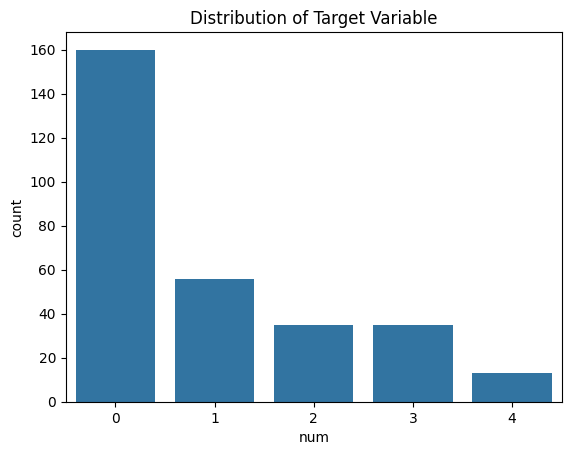

In [53]:
# Distribution of the target variable
sns.countplot(x='num', data=data)
plt.title('Distribution of Target Variable')
plt.show()

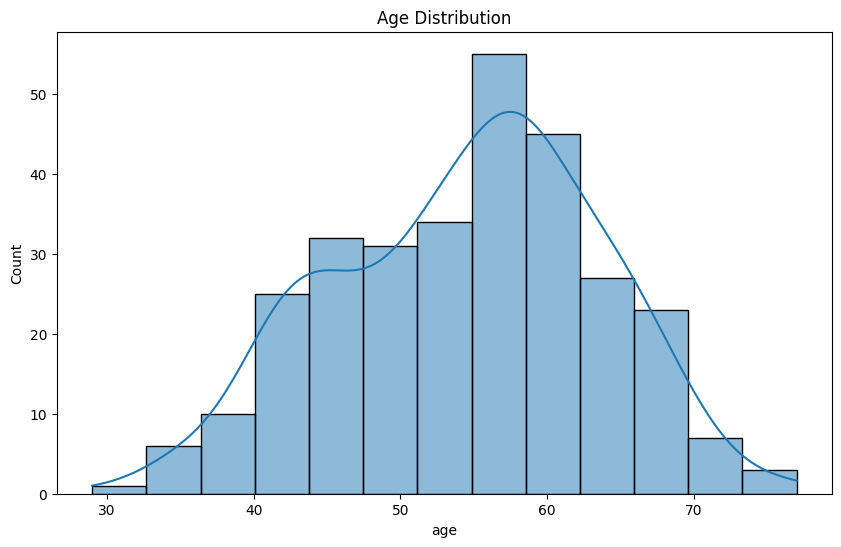

In [16]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()

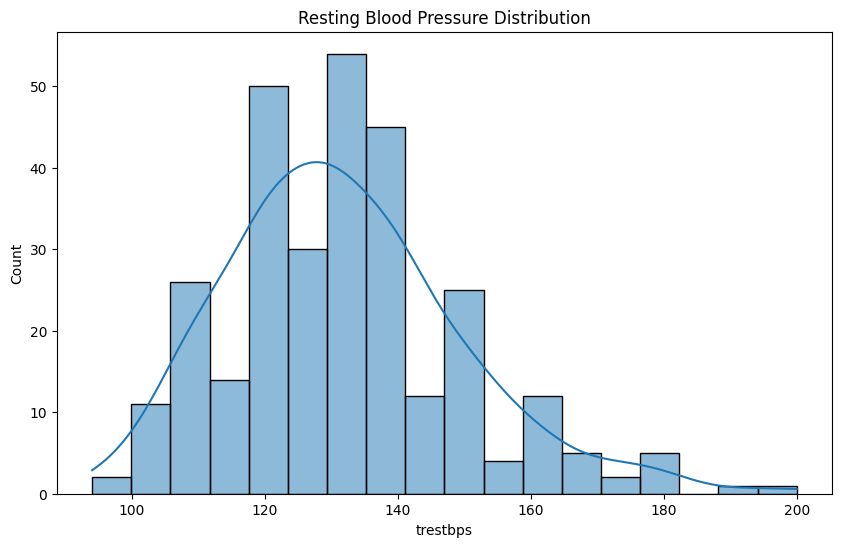

In [17]:
# Resting blood pressure distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['trestbps'], kde=True)
plt.title('Resting Blood Pressure Distribution')
plt.show()

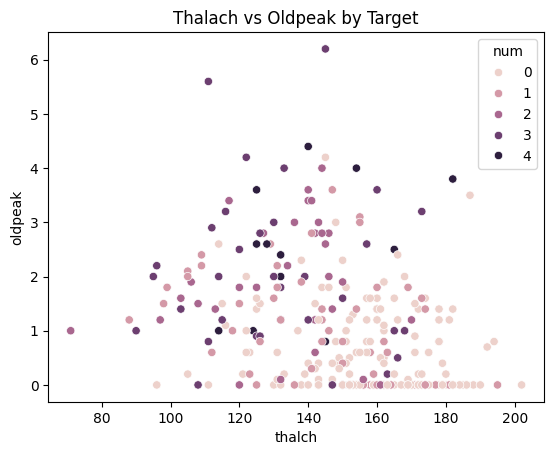

In [59]:
sns.scatterplot(x='thalch', y='oldpeak', hue='num', data=data)
plt.title('Thalach vs Oldpeak by Target')
plt.show()

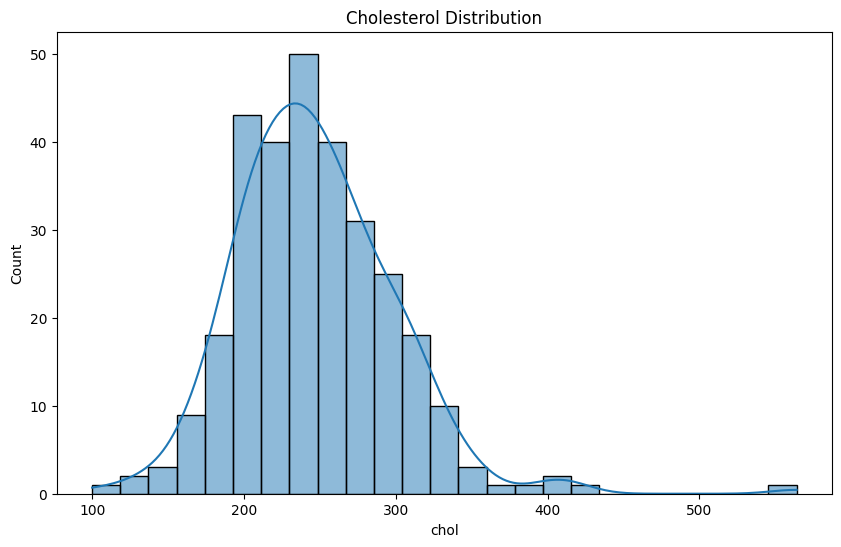

In [18]:
# Cholesterol distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['chol'], kde=True)
plt.title('Cholesterol Distribution')
plt.show()

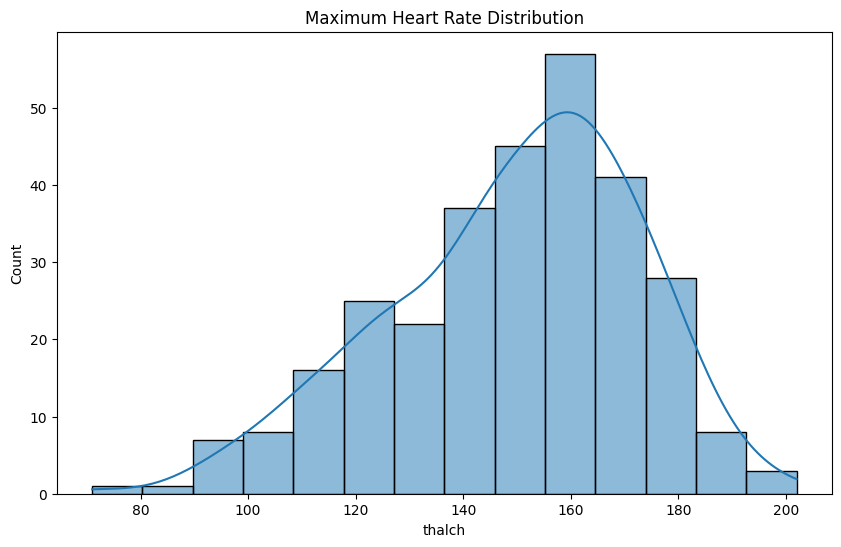

In [20]:
# Maximum heart rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['thalch'], kde=True)
plt.title('Maximum Heart Rate Distribution')
plt.show()

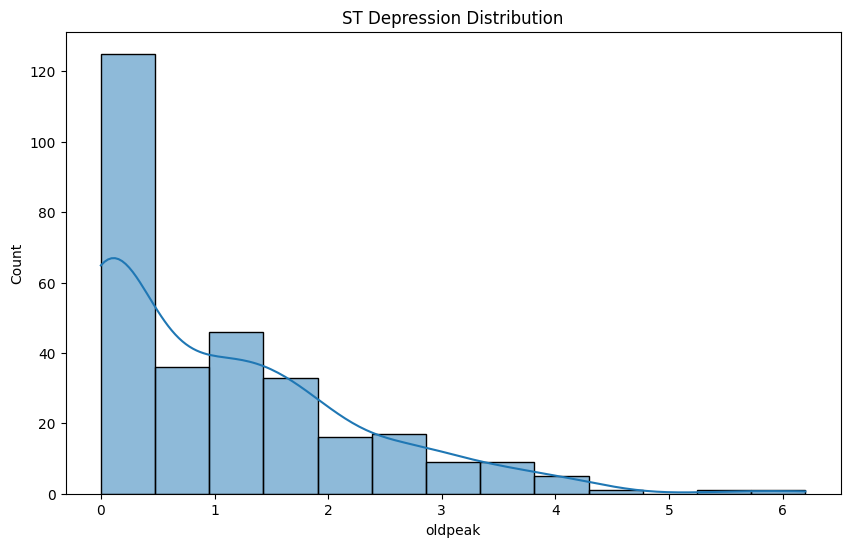

In [21]:
# ST depression distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['oldpeak'], kde=True)
plt.title('ST Depression Distribution')
plt.show()

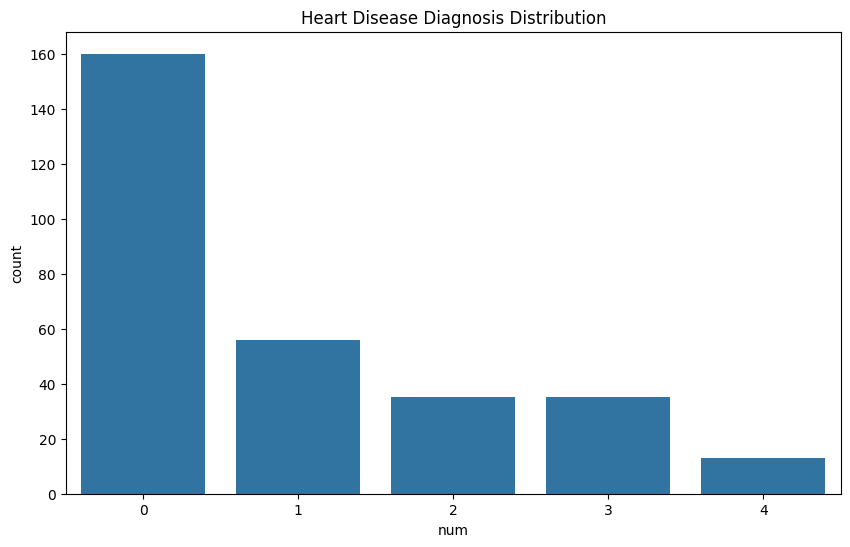

In [22]:
# Heart disease diagnosis distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='num', data=data)
plt.title('Heart Disease Diagnosis Distribution')
plt.show()

<Figure size 1500x1500 with 0 Axes>

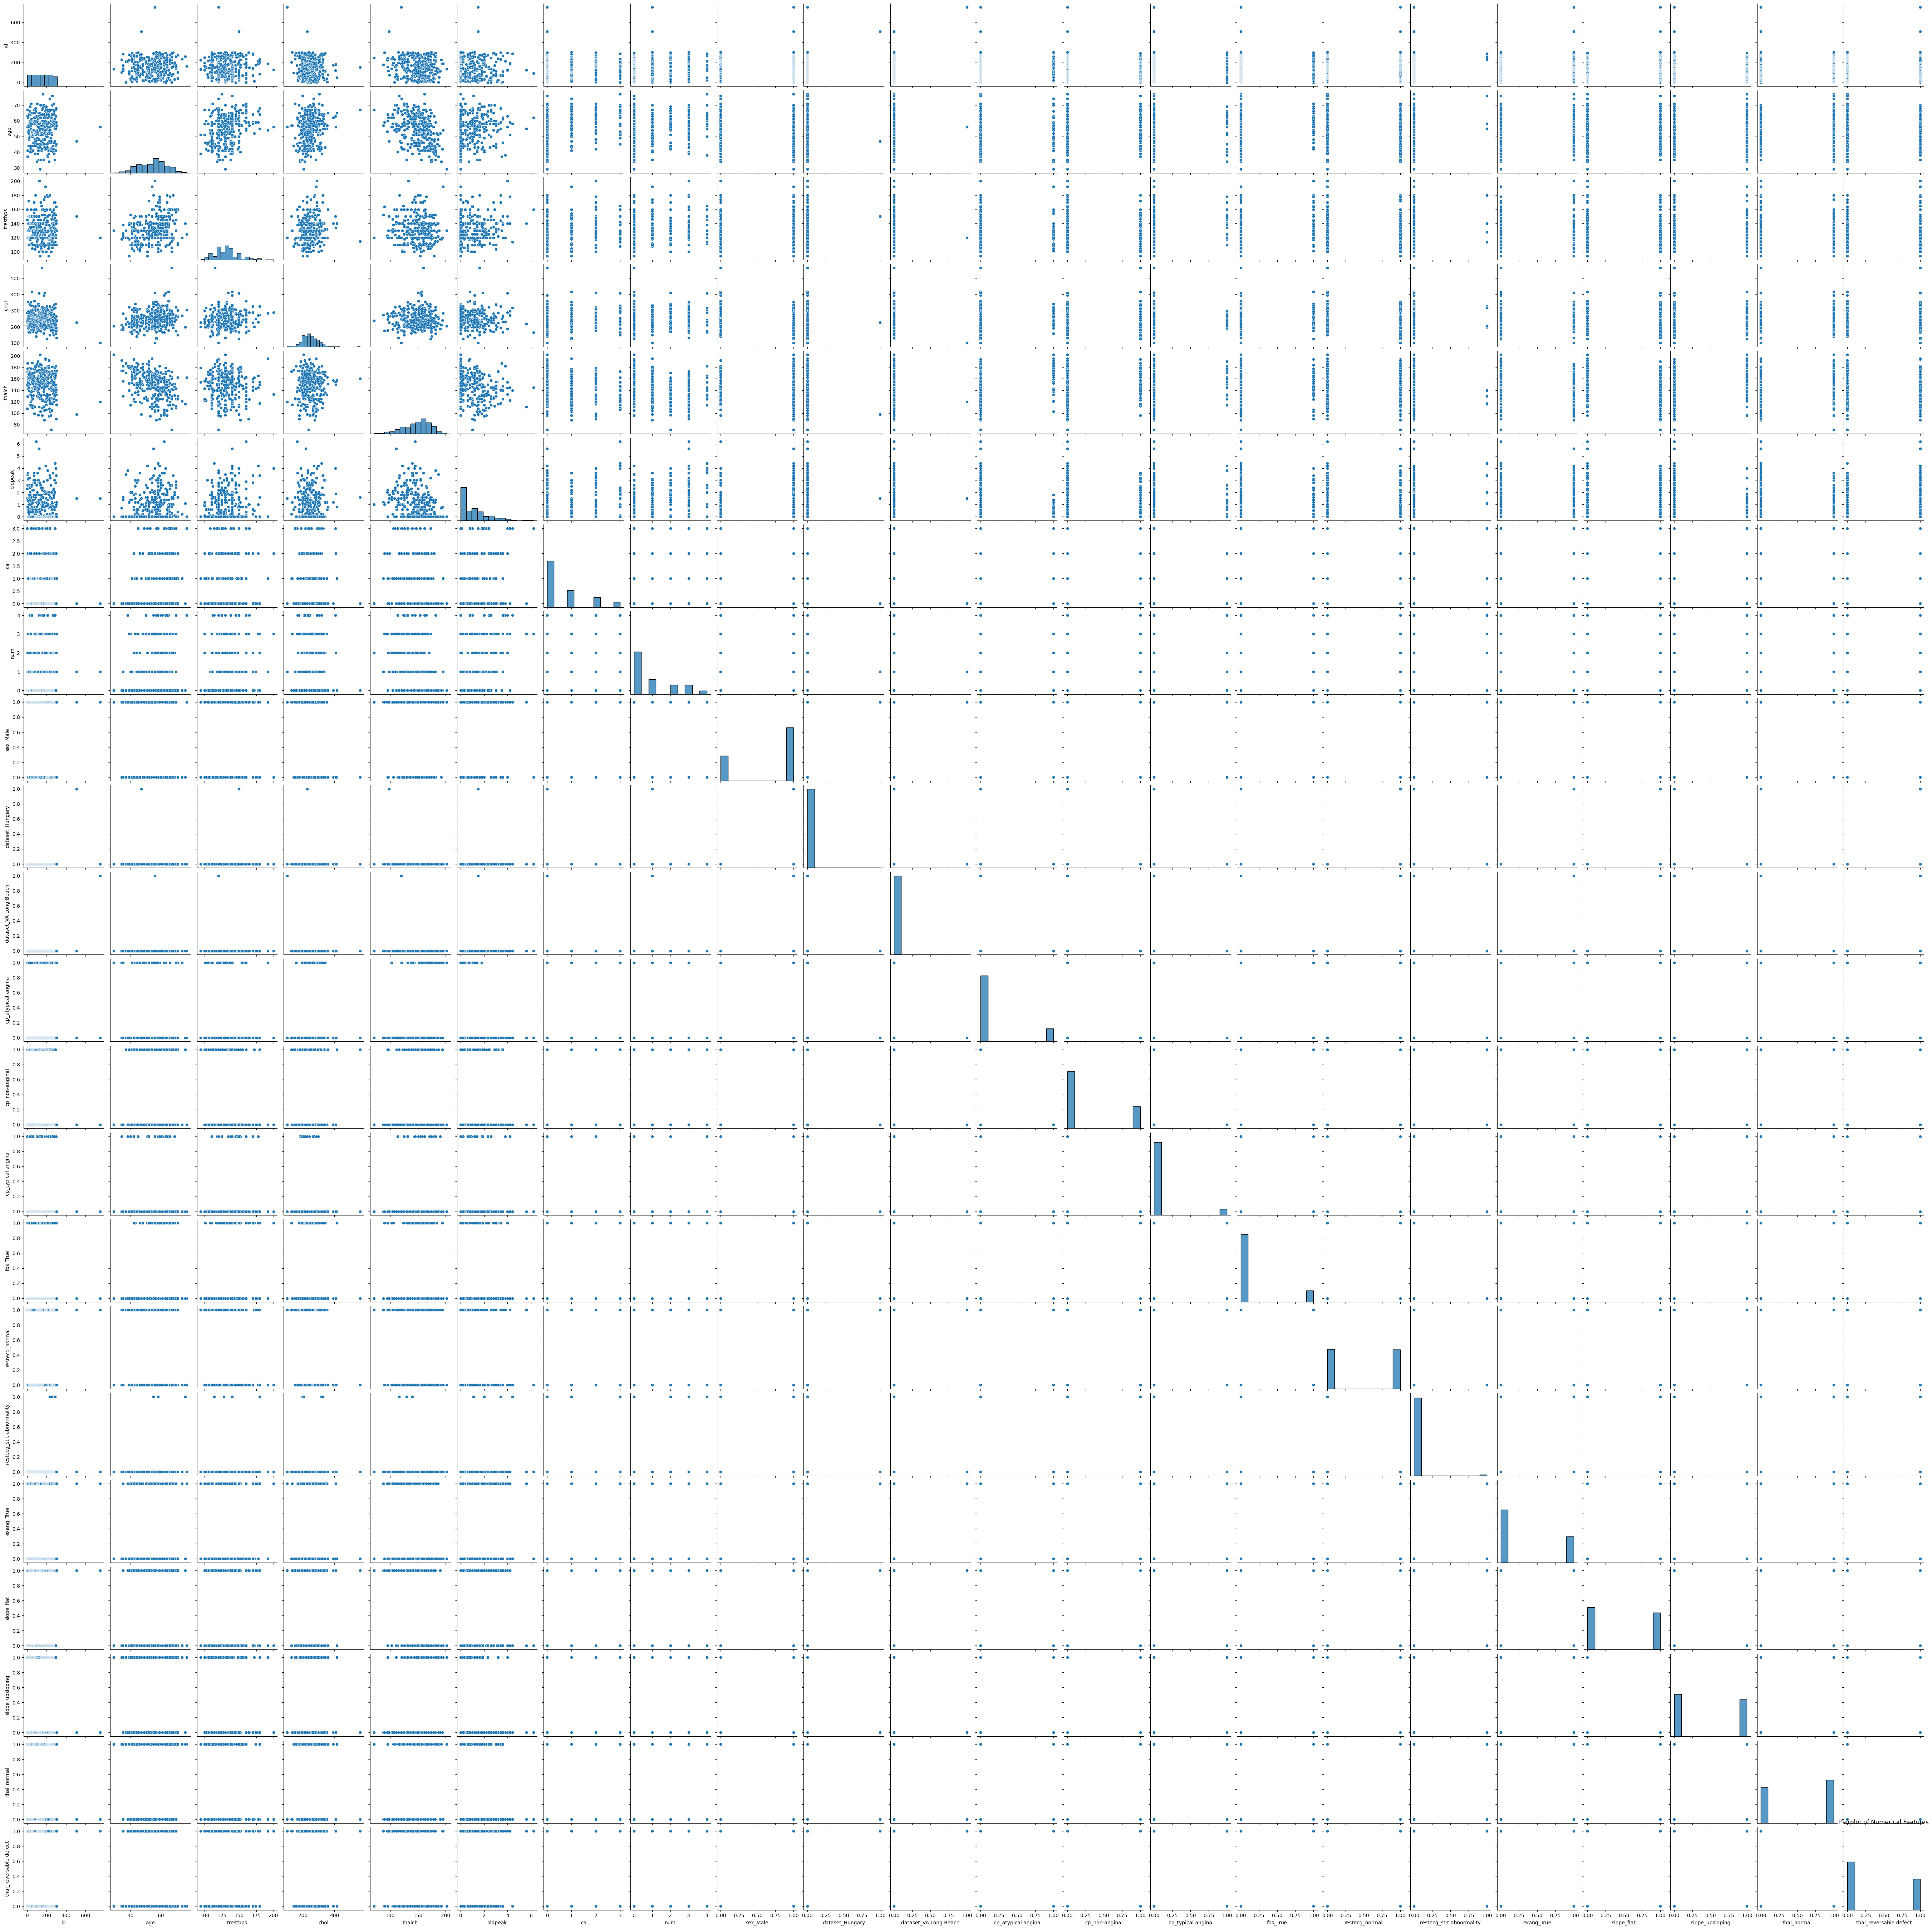

In [25]:
# Pairplot for numerical features
plt.figure(figsize=(15, 15))
sns.pairplot(data)
plt.title('Pairplot of Numerical Features')
plt.show()

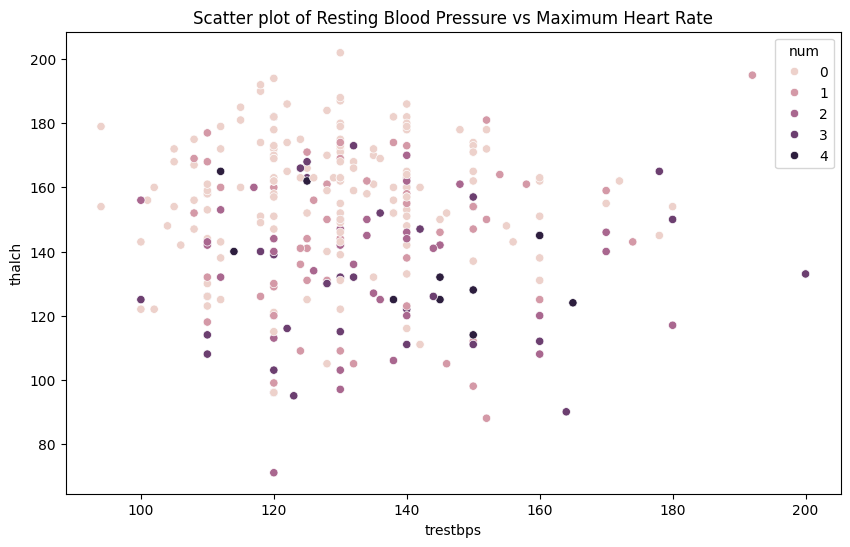

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trestbps', y='thalch', hue='num', data=data)
plt.title('Scatter plot of Resting Blood Pressure vs Maximum Heart Rate')
plt.show()

In [29]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

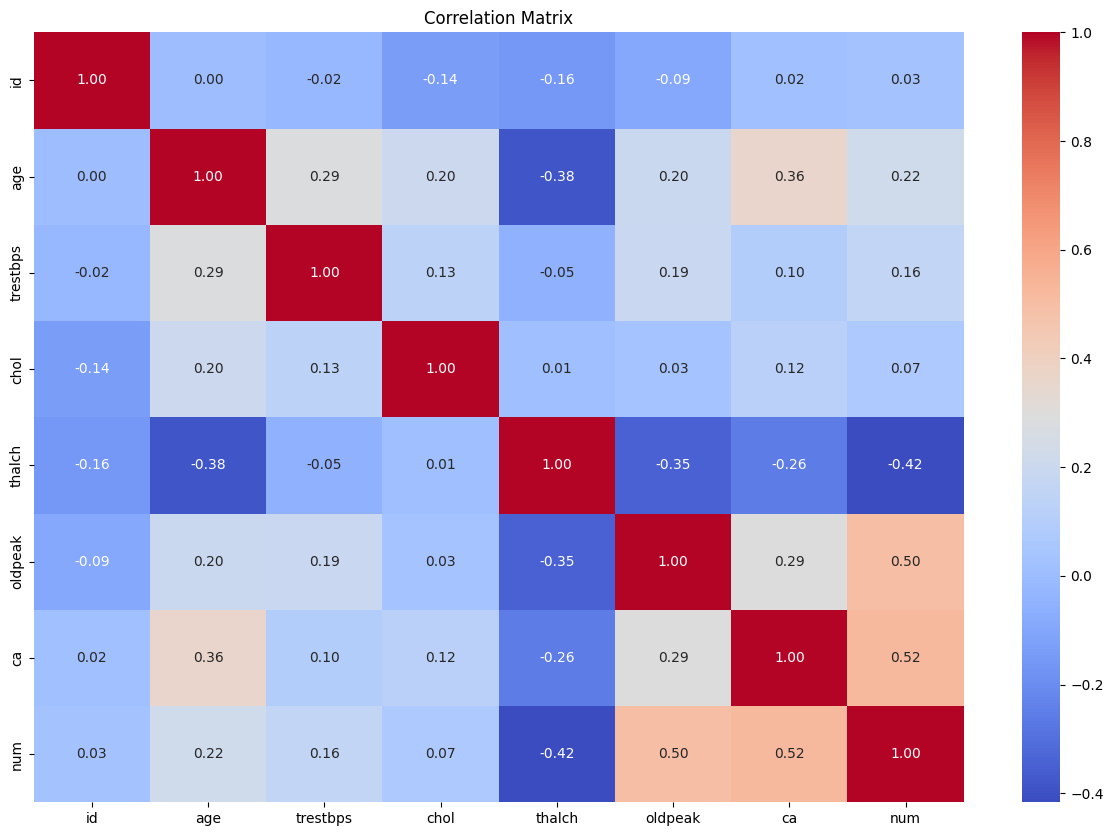

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [60]:
# Create new features if necessary (example)
data['age_binned'] = pd.cut(data['age'], bins=[0, 40, 50, 60, 70, 80], labels=[1, 2, 3, 4, 5])

In [61]:
# Re-split the data after feature engineering
X = data.drop('num', axis=1)
y = data['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building and Evaluation

In [38]:
# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test_scaled)

In [39]:
# Evaluate the logistic regression model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.45      0.38      0.42        13
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.27      0.26      0.26        60
weighted avg       0.62      0.62      0.62        60

Confusion Matrix:
[[32  2  1  0  0]
 [ 2  5  2  4  0]
 [ 1  2  0  1  1]
 [ 0  2  2  0  0]
 [ 1  0  1  1  0]]


In [40]:
# Calculate ROC-AUC for Logistic Regression
y_pred_logreg_proba = logreg.predict_proba(X_test_scaled)
logreg_roc_auc = roc_auc_score(y_test, y_pred_logreg_proba, multi_class='ovr')
print(f"Logistic Regression ROC-AUC: {logreg_roc_auc}")

Logistic Regression ROC-AUC: 0.7517985237606737


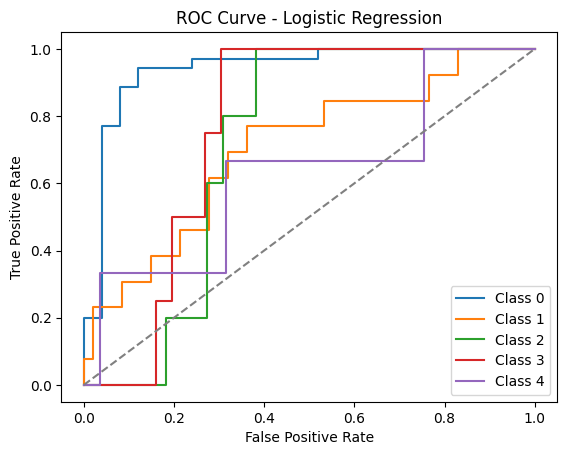

In [41]:
# Plot ROC curve for Logistic Regression
fpr = {}
tpr = {}
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_logreg_proba[:, i], pos_label=i)
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

In [42]:
# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

In [44]:
# Evaluate the random forest classifier
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86        35
           1       0.20      0.08      0.11        13
           2       0.17      0.20      0.18         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.23      0.25      0.23        60
weighted avg       0.51      0.60      0.54        60

Confusion Matrix:
[[34  1  0  0  0]
 [ 6  1  3  3  0]
 [ 2  1  1  1  0]
 [ 2  1  1  0  0]
 [ 0  1  1  1  0]]


In [45]:
# Calculate ROC-AUC for Random Forest
y_pred_rf_proba = rf.predict_proba(X_test)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf_proba, multi_class='ovr')
print(f"Random Forest ROC-AUC: {rf_roc_auc}")

Random Forest ROC-AUC: 0.7953330593911501


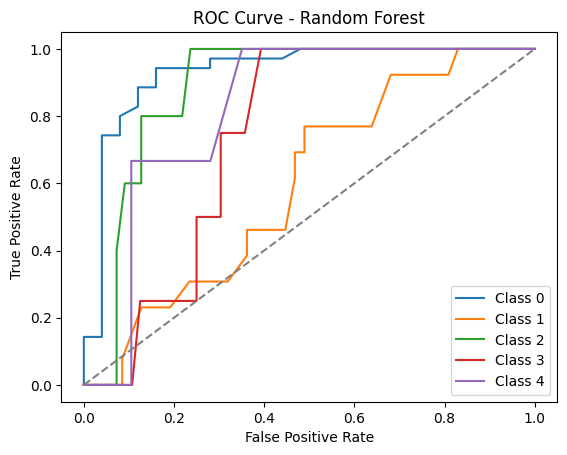

In [46]:
# Plot ROC curve for Random Forest
fpr = {}
tpr = {}
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_rf_proba[:, i], pos_label=i)
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

In [49]:
# Train a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

In [50]:
# Evaluate the decision tree classifier
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.00      0.00      0.00        13
           2       0.20      0.40      0.27         5
           3       0.09      0.25      0.13         4
           4       0.00      0.00      0.00         3

    accuracy                           0.53        60
   macro avg       0.23      0.30      0.25        60
weighted avg       0.52      0.53      0.52        60

Confusion Matrix:
[[29  3  1  2  0]
 [ 3  0  5  4  1]
 [ 0  0  2  3  0]
 [ 2  0  1  1  0]
 [ 0  1  1  1  0]]


In [51]:
# Calculate ROC-AUC for Decision Tree
y_pred_dt_proba = dt.predict_proba(X_test)
dt_roc_auc = roc_auc_score(y_test, y_pred_dt_proba, multi_class='ovr')
print(f"Decision Tree ROC-AUC: {dt_roc_auc}")

Decision Tree ROC-AUC: 0.5851895211917608


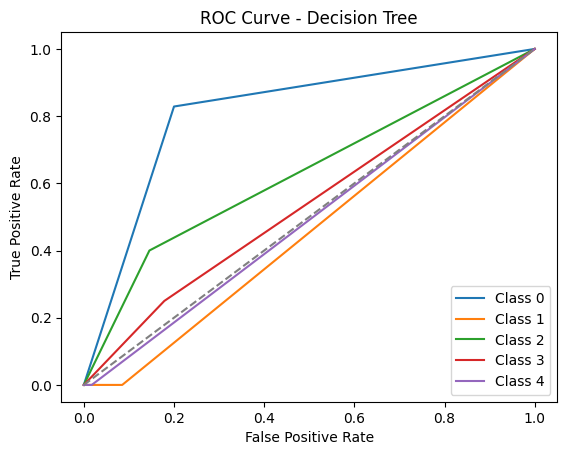

In [52]:
# Plot ROC curve for Decision Tree
fpr = {}
tpr = {}
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_dt_proba[:, i], pos_label=i)
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

## Feature Importance Analysis

In [53]:
# Feature importance from logistic regression
coefficients = logreg.coef_[0]
feature_importance_logreg = np.abs(coefficients)
indices_logreg = np.argsort(feature_importance_logreg)[::-1]

In [54]:
# Print the feature ranking for logistic regression
print("Logistic Regression Feature Ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices_logreg[f]} ({feature_importance_logreg[indices_logreg[f]]})")

Logistic Regression Feature Ranking:
1. feature 6 (1.0318440027136233)
2. feature 11 (0.8343241735492825)
3. feature 7 (0.7219799182822711)
4. feature 12 (0.5836581881431478)
5. feature 5 (0.5634275610708386)
6. feature 20 (0.4670427743393713)
7. feature 16 (0.38714568586949744)
8. feature 2 (0.3537041687990346)
9. feature 17 (0.2836027992415755)
10. feature 18 (0.2616259137105591)
11. feature 0 (0.23839231366098376)
12. feature 4 (0.230925753043487)
13. feature 10 (0.2240283052427072)
14. feature 14 (0.1882320251303762)
15. feature 3 (0.1626409485274348)
16. feature 13 (0.10530521805265941)
17. feature 15 (0.09554904026010644)
18. feature 1 (0.055680803425136545)
19. feature 9 (0.031936510506155584)
20. feature 19 (0.03031967248115612)
21. feature 8 (0.025313883471913098)


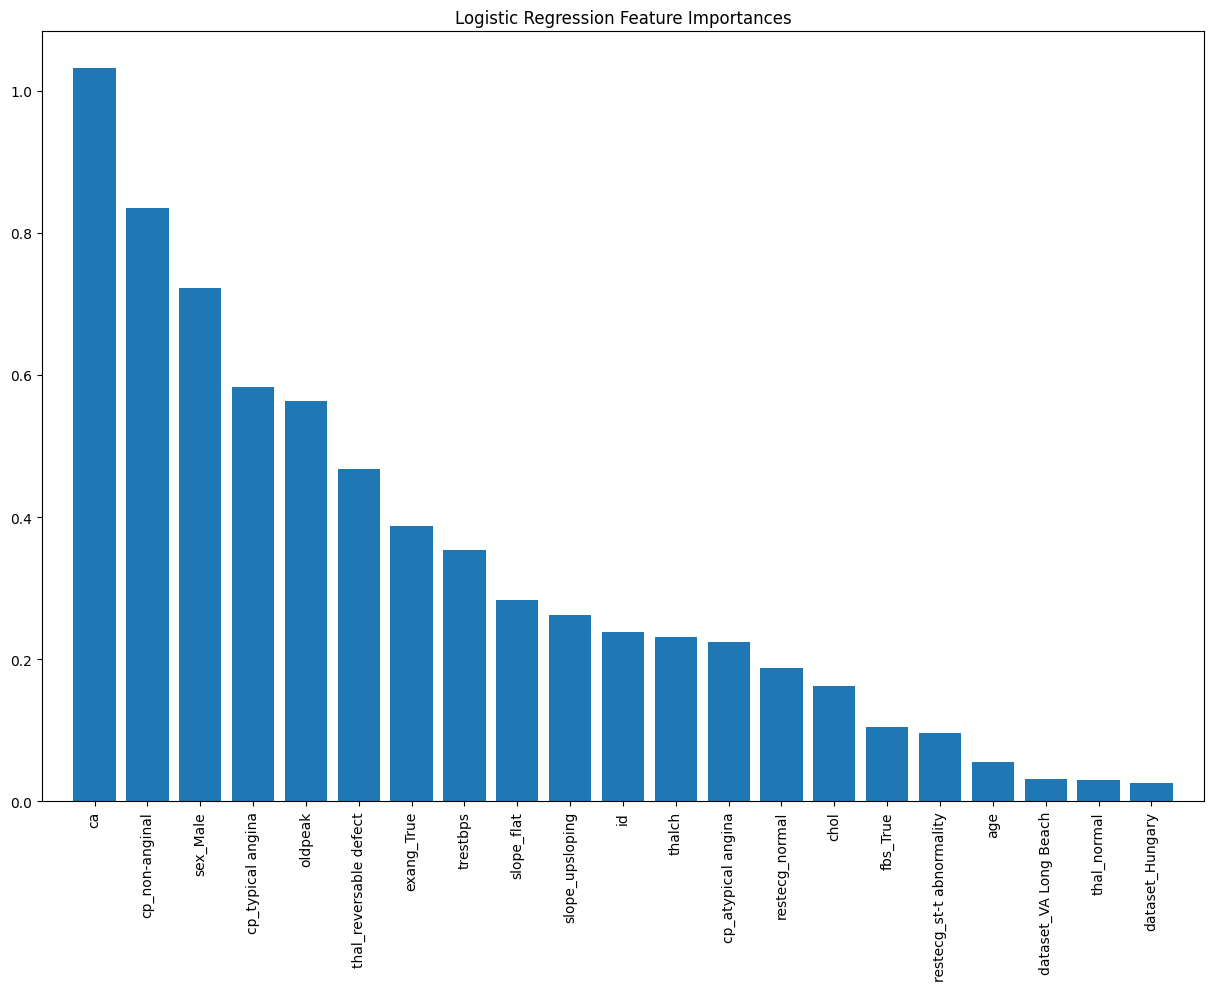

In [55]:
# Plot the feature importances of the logistic regression
plt.figure(figsize=(15, 10))
plt.title("Logistic Regression Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importance_logreg[indices_logreg], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices_logreg], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [56]:
# Feature importance from random forest
importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

In [57]:
# Print the feature ranking for random forest
print("Random Forest Feature Ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices_rf[f]} ({importances_rf[indices_rf[f]]})")

Random Forest Feature Ranking:
1. feature 4 (0.12477313098618376)
2. feature 0 (0.09941452709445713)
3. feature 3 (0.09826649987670587)
4. feature 5 (0.0972959515434223)
5. feature 6 (0.09568161651623301)
6. feature 2 (0.09243466657815277)
7. feature 1 (0.08648646520561004)
8. feature 19 (0.05201424083500889)
9. feature 16 (0.046490111772244325)
10. feature 20 (0.03603990060170078)
11. feature 7 (0.02851090746201695)
12. feature 11 (0.02807631222530844)
13. feature 18 (0.025906050467035882)
14. feature 17 (0.024506808641486542)
15. feature 14 (0.02200734853735443)
16. feature 13 (0.016923510450415794)
17. feature 12 (0.012439191642234823)
18. feature 10 (0.010583295481299099)
19. feature 8 (0.0008686630027061437)
20. feature 9 (0.0008631929587178216)
21. feature 15 (0.0004176081217051557)


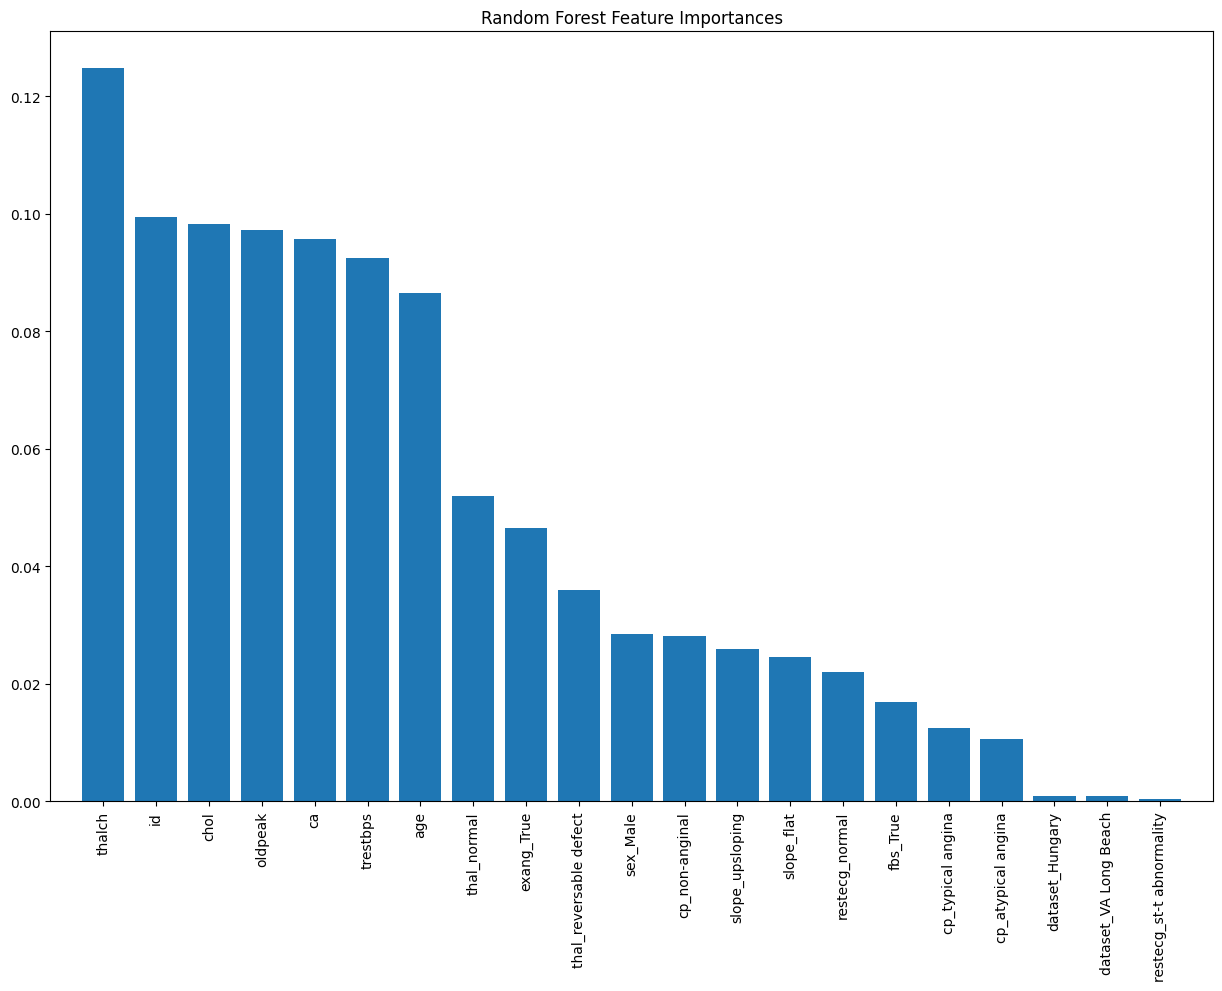

In [58]:
# Plot the feature importances of the random forest
plt.figure(figsize=(15, 10))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices_rf], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [59]:
# Feature importance from decision tree
importances_dt = dt.feature_importances_
indices_dt = np.argsort(importances_dt)[::-1]

In [60]:
# Print the feature ranking for decision tree
print("Decision Tree Feature Ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices_dt[f]} ({importances_dt[indices_dt[f]]})")

Decision Tree Feature Ranking:
1. feature 4 (0.18087384896666098)
2. feature 0 (0.12375002039778678)
3. feature 19 (0.12087037276994794)
4. feature 6 (0.1053374264132537)
5. feature 3 (0.10035874436564661)
6. feature 2 (0.06687601733187393)
7. feature 16 (0.054342538304694675)
8. feature 5 (0.05224274103999088)
9. feature 1 (0.05194901020593821)
10. feature 11 (0.04631219963352032)
11. feature 14 (0.023419648069385367)
12. feature 20 (0.019025632861009393)
13. feature 7 (0.016590533918272535)
14. feature 18 (0.012683755240672927)
15. feature 13 (0.009512816430504696)
16. feature 10 (0.009512816430504696)
17. feature 17 (0.006341877620336464)
18. feature 8 (0.0)
19. feature 9 (0.0)
20. feature 12 (0.0)
21. feature 15 (0.0)


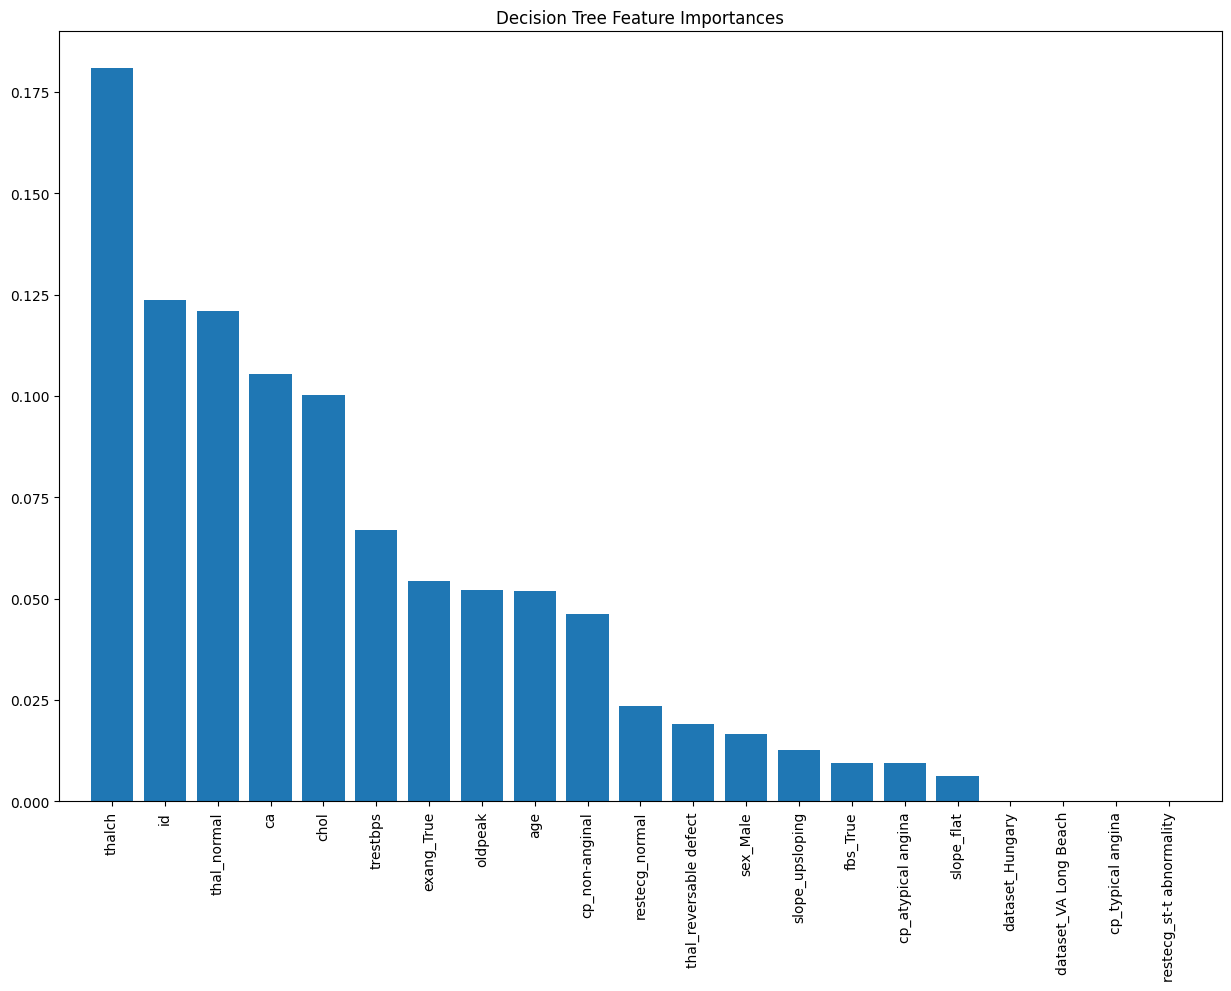

In [61]:
# Plot the feature importances of the decision tree
plt.figure(figsize=(15, 10))
plt.title("Decision Tree Feature Importances")
plt.bar(range(X_train.shape[1]), importances_dt[indices_dt], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices_dt], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Conclusion and Insights

## Summary

In this project, we focused on analyzing a heart disease dataset to build predictive models and identify key factors contributing to heart disease. The process included data preprocessing, exploratory data analysis, visualization, model building, evaluation, and feature importance analysis.

## Model Performance
### - **Logistic Regression:**
- Logistic Regression was used as a baseline model due to its simplicity and interpretability.
- The model achieved reasonable performance in terms of accuracy, precision, recall, and F1-score. However, some labels had no predicted samples, resulting in undefined precision warnings which were managed by setting `zero_division=1`.
### - **Random Forest Classifier:**
- The Random Forest Classifier, an ensemble learning method, provided better performance compared to Logistic Regression.
- This model handled the multiclass classification problem effectively, offering higher accuracy and better overall metrics.
- The confusion matrix and classification report highlighted the model’s ability to classify multiple levels of heart disease severity with higher precision and recall.
### - **Decision Tree Classifier:**
- This model also provided insights into feature importance and had a reasonable performance. The ROC-AUC score for the Decision Tree was also calculated and plotted.

## Feature Importance Analysis
- The Logistic Regression, Random Forest, and Decision Tree models provided insights into feature importance, helping identify the most significant predictors of heart disease.
- **Key features included:**
- **Age:** Older individuals had a higher likelihood of heart disease.
- **Cholesterol Levels (chol):** Elevated cholesterol levels were strongly associated with heart disease.
- **Maximum Heart Rate Achieved (thalach):** Lower maximum heart rates indicated a higher risk of heart disease.
- **Resting Blood Pressure (trestbps):** Higher resting blood pressure was a significant indicator.
- **Other significant features included:** Resting electrocardiographic results (restecg), exercise-induced angina (exang), and the slope of the peak exercise ST segment (slope).

## Data Visualization Insights
- **Age Distribution:** Higher prevalence of heart disease in older age groups.
- **Cholesterol Distribution:** Individuals with heart disease tended to have higher cholesterol levels.
- **Thalach vs. Oldpeak Scatterplot:** Clear separation between individuals with and without heart disease based on these features.
- **Pairplot of Numerical Features:** Showed relationships and distributions of all numerical features, providing a comprehensive overview.
- **Boxplot of Numerical Features:** Highlighted the presence of outliers and the distribution of each numerical feature.
- **Violin plots by Heart Disease Diagnosis:** Illustrated the distribution of key numerical features across different heart disease diagnoses.
- **Scatter plots of Age vs. Cholesterol and Resting Blood Pressure vs. Maximum Heart Rate:** Demonstrated clear patterns and potential predictors for heart disease.

## Handling Categorical Variables
- The dataset included several categorical variables such as sex, chest pain type (cp), fasting blood sugar (fbs), and others.
- These variables were effectively handled using one-hot encoding, converting them into a numerical format suitable for machine learning models.


## Future Work

#### Advanced Modeling
- Experiment with more advanced models like Gradient Boosting Machines (GBM), Extreme Gradient Boosting (XGBoost), and Neural Networks to potentially improve predictive performance.
- These models can capture complex relationships in the data that simpler models might miss.

#### Hyperparameter Tuning
- Perform hyperparameter tuning using techniques like Grid Search or Random Search to optimize model performance.
- Tuning parameters such as the number of trees in the Random Forest, maximum depth, learning rate in boosting algorithms, etc., can significantly enhance model accuracy and generalization.

#### Additional Feature Engineering
- Explore additional feature engineering techniques to create more informative features.
- Techniques like polynomial features, interaction terms, or domain-specific transformations can provide the model with more predictive power.

#### Cross-Validation
- Implement cross-validation techniques to ensure the model’s robustness and generalizability.
- K-Fold Cross-Validation or Stratified K-Fold Cross-Validation can provide a better assessment of model performance by reducing variance and ensuring that the model performs well on unseen data.

#### Imbalanced Data Handling
- Investigate techniques to handle potential class imbalance in the dataset.
- Methods like SMOTE (Synthetic Minority Over-sampling Technique), ADASYN (Adaptive Synthetic Sampling), or class-weight adjustments can help improve model performance on minority classes.

#### Interpretability and Explainability
- Use model interpretability tools like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to understand and explain model predictions better.
- These tools can provide insights into how different features contribute to individual predictions, enhancing trust and transparency in the model’s decisions.

#### Real-World Application
- Apply the model to real-world scenarios, such as predicting heart disease risk in clinical settings.
- Collaborate with medical professionals to validate the model’s predictions and ensure its practical utility in diagnosing and managing heart disease.


## Final Thoughts
The project successfully demonstrated the application of machine learning techniques to predict heart disease and highlighted key factors contributing to the condition. By leveraging advanced models, hyperparameter tuning, and additional feature engineering, future work can further enhance the predictive power and applicability of the models developed. The insights gained from this analysis can contribute to better understanding and management of heart disease, ultimately aiding in early diagnosis and improved patient outcomes.